<a href="https://colab.research.google.com/github/SandrAlzate/CV/blob/master/Copia_de_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Cargar datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


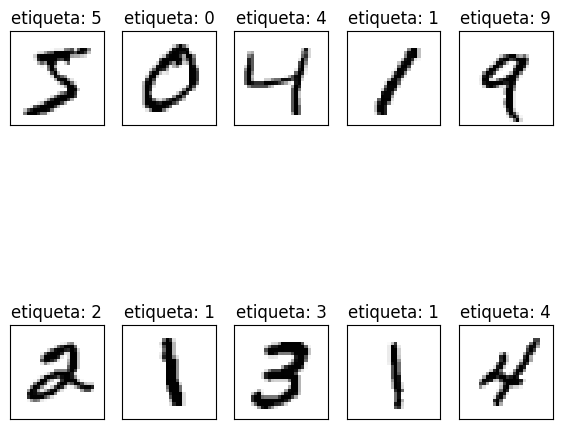

In [ ]:
plt.figure(figsize=(7,7))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.title(f'etiqueta: {y_train[i]}')

In [ ]:
#Normalizar
X_train = x_train.astype('float32')/255
X_test = x_test.astype('float32')/255


In [ ]:
x_train_flat = x_train.reshape(60000, 784)
x_test_flat = x_test.reshape(10000, 784)
y_train_flat = y_train.reshape(60000,)
y_test_flat = y_test.reshape(10000, )

In [ ]:
#convertir imagenes
X_train_flat=X_train.reshape(60000,784)
X_test_test_flat=X_test.reshape(10000,784)

In [ ]:
#convertir etiquetas (0-9)
from tensorflow.keras.utils import to_categorical
y_train_cat= to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

In [ ]:
print(f"forma de y_train:vat: {y_train_cat.shape}")

forma de y_train:vat: (60000, 10)


In [ ]:
print(f"ejemplo de etiqueta original: {y_train[4]}")

ejemplo de etiqueta original: 9


In [ ]:
print(f"ejemplo de etiqueta one-hot: {y_train_cat[4]}")

ejemplo de etiqueta one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
#crear el modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model= Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])

In [ ]:
#compilar el modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#resumen del modelo
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Entrenar el modelo
history= model.fit(
    x_train_flat,
    y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1

)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5130 - loss: 15.4023 - val_accuracy: 0.7916 - val_loss: 0.7904
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7176 - loss: 1.1231 - val_accuracy: 0.8662 - val_loss: 0.4931
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8036 - loss: 0.7459 - val_accuracy: 0.9053 - val_loss: 0.3645
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8500 - loss: 0.5520 - val_accuracy: 0.9177 - val_loss: 0.2972
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8733 - loss: 0.4539 - val_accuracy: 0.9280 - val_loss: 0.2520
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8887 - loss: 0.3903 - val_accuracy: 0.9412 - val_loss: 0.2274
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9021 - loss: 0.3479 - val_accuracy: 0.9427 - val_loss: 0.2171
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9115 - loss: 0.3148 - val_accuracy: 0

In [ ]:
#evaluar el modelo
test_loss, test_acc = model.evaluate(x_test_flat, y_test_cat)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9423 - loss: 0.2338
Test accuracy: 0.9498000144958496


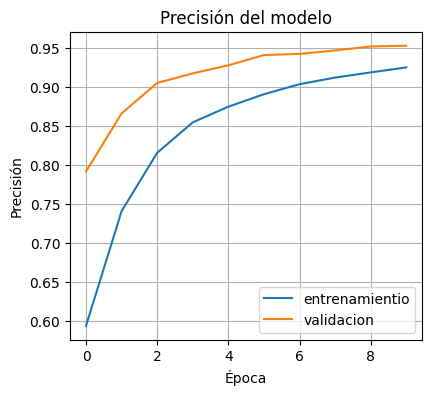

In [ ]:
# visualizar curvas de aprendizaje
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='entrenamientio')
plt.plot(history.history['val_accuracy'], label='validacion')
plt.title('Precisión del modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)